In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [4]:
file = open("C:\\Users\\Haitam\\Desktop\\projectdata.txt", "r", encoding = "utf8")
lines = []

for i in file:
    lines.append(i)
    
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  Shadow had done three years in 

The Last Line:  ...MY MOTHER! 


In [5]:
data = ""

for i in lines:
    data = ' '. join(lines)
    
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'Shadow had done three years in  prison.   “I have taken the liberty,” said  Mr. Wednesday, washing his  hands. . . .   There was a thin young woman  behind the counter. . . .   Shadow and Wednesday ate  breakfast at a Country  Kitchen. . . .   Only Zorya Utrennyaya was  awake to say goodbye to  them. . . .   One moment Shadow was riding  the World’s Largest '

In [6]:
import string

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

new_data[:500]

'Shadow had done three years in  prison    “I have taken the liberty ” said  Mr  Wednesday  washing his  hands          There was a thin young woman  behind the counter          Shadow and Wednesday ate  breakfast at a Country  Kitchen          Only Zorya Utrennyaya was  awake to say goodbye to  them          One moment Shadow was riding  the World’s Largest            Chapter 7 §f 88 had been walking south   or what he hoped was          The week before Christmas is  Chapter 8 „     c     often '

In [7]:
z = []

for i in data.split():
    if i not in z:
        z.append(i)
        
data = ' '.join(z)
data[:500]

'Shadow had done three years in prison. “I have taken the liberty,” said Mr. Wednesday, washing his hands. . There was a thin young woman behind counter. and Wednesday ate breakfast at Country Kitchen. Only Zorya Utrennyaya awake to say goodbye them. One moment riding World’s Largest Chapter 7 §f&88^had been walking south, or what he hoped was. The week before Christmas is 8 „ , c often quiet one ftmeral parlor. Part Two MYAINSEL 9 As they drove out of Illinois late that evening, asked. ... 10 11'

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:10]

[3, 216, 594, 24, 48, 25, 49, 595, 217, 218]

In [9]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2302


In [10]:
sequences = []

for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)
    
print("Length of the sequences : ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

Length of the sequences :  3535


array([[  3, 216],
       [216, 594],
       [594,  24],
       [ 24,  48],
       [ 48,  25],
       [ 25,  49],
       [ 49, 595],
       [595, 217],
       [217, 218],
       [218,  12]])

In [11]:
X = []
y = []

for i in sequences:
    X.append(i[0])
    y.append(i[1])
    
X = np.array(X)
y = np.array(y)
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [  3 216 594  24  48]
The responses are:  [216 594  24  48  25]


In [12]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 10)             23020     
                                                                 
 lstm_2 (LSTM)               (None, 1, 1000)           4044000   
                                                                 
 lstm_3 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 2302)              2304302   
                                                                 
Total params: 15,376,322
Trainable params: 15,376,322
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='model1.png', show_layer_names=True)

AttributeError: module 'pyexpat.model' has no attribute 'built'

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto')

reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [19]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))


In [20]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])


Epoch 1/150
56/56 [==============================] - ETA: 0s - loss: 7.7406
Epoch 1: loss improved from inf to 7.74060, saving model to nextword1.h5
56/56 [==============================] - 21s 256ms/step - loss: 7.7406 - lr: 0.0010
Epoch 2/150
56/56 [==============================] - ETA: 0s - loss: 7.5217
Epoch 2: loss improved from 7.74060 to 7.52171, saving model to nextword1.h5
56/56 [==============================] - 13s 235ms/step - loss: 7.5217 - lr: 0.0010
Epoch 3/150
56/56 [==============================] - ETA: 0s - loss: 7.2814
Epoch 3: loss improved from 7.52171 to 7.28145, saving model to nextword1.h5
56/56 [==============================] - 14s 252ms/step - loss: 7.2814 - lr: 0.0010
Epoch 4/150
56/56 [==============================] - ETA: 0s - loss: 7.0093
Epoch 4: loss improved from 7.28145 to 7.00927, saving model to nextword1.h5
56/56 [==============================] - 14s 250ms/step - loss: 7.0093 - lr: 0.0010
Epoch 5/150
56/56 [==============================] - ETA

56/56 [==============================] - 13s 229ms/step - loss: 4.4796 - lr: 0.0010
Epoch 36/150
56/56 [==============================] - ETA: 0s - loss: 4.4363
Epoch 36: loss improved from 4.47959 to 4.43629, saving model to nextword1.h5
56/56 [==============================] - 14s 246ms/step - loss: 4.4363 - lr: 0.0010
Epoch 37/150
56/56 [==============================] - ETA: 0s - loss: 4.3740
Epoch 37: loss improved from 4.43629 to 4.37396, saving model to nextword1.h5
56/56 [==============================] - 13s 230ms/step - loss: 4.3740 - lr: 0.0010
Epoch 38/150
56/56 [==============================] - ETA: 0s - loss: 4.2888
Epoch 38: loss improved from 4.37396 to 4.28884, saving model to nextword1.h5
56/56 [==============================] - 14s 243ms/step - loss: 4.2888 - lr: 0.0010
Epoch 39/150
56/56 [==============================] - ETA: 0s - loss: 4.2262
Epoch 39: loss improved from 4.28884 to 4.22622, saving model to nextword1.h5
56/56 [==============================] - 15s

Epoch 105/150
56/56 [==============================] - ETA: 0s - loss: 1.9266
Epoch 105: loss improved from 1.95983 to 1.92664, saving model to nextword1.h5
56/56 [==============================] - 14s 247ms/step - loss: 1.9266 - lr: 0.0010
Epoch 106/150
56/56 [==============================] - ETA: 0s - loss: 1.8991
Epoch 106: loss improved from 1.92664 to 1.89907, saving model to nextword1.h5
56/56 [==============================] - 13s 224ms/step - loss: 1.8991 - lr: 0.0010
Epoch 107/150
56/56 [==============================] - ETA: 0s - loss: 1.8721
Epoch 107: loss improved from 1.89907 to 1.87207, saving model to nextword1.h5
56/56 [==============================] - 13s 225ms/step - loss: 1.8721 - lr: 0.0010
Epoch 108/150
56/56 [==============================] - ETA: 0s - loss: 1.8905
Epoch 108: loss did not improve from 1.87207
56/56 [==============================] - 12s 222ms/step - loss: 1.8905 - lr: 0.0010
Epoch 109/150
56/56 [==============================] - ETA: 0s - loss:

56/56 [==============================] - ETA: 0s - loss: 1.0877
Epoch 139: loss did not improve from 1.08648
56/56 [==============================] - 12s 218ms/step - loss: 1.0877 - lr: 2.0000e-04
Epoch 140/150
56/56 [==============================] - ETA: 0s - loss: 1.0809
Epoch 140: loss improved from 1.08648 to 1.08088, saving model to nextword1.h5
56/56 [==============================] - 12s 223ms/step - loss: 1.0809 - lr: 2.0000e-04
Epoch 141/150
56/56 [==============================] - ETA: 0s - loss: 1.0790
Epoch 141: loss improved from 1.08088 to 1.07904, saving model to nextword1.h5
56/56 [==============================] - 15s 265ms/step - loss: 1.0790 - lr: 2.0000e-04
Epoch 142/150
56/56 [==============================] - ETA: 0s - loss: 1.0752
Epoch 142: loss improved from 1.07904 to 1.07516, saving model to nextword1.h5
56/56 [==============================] - 13s 233ms/step - loss: 1.0752 - lr: 2.0000e-04
Epoch 143/150
56/56 [==============================] - ETA: 0s - los

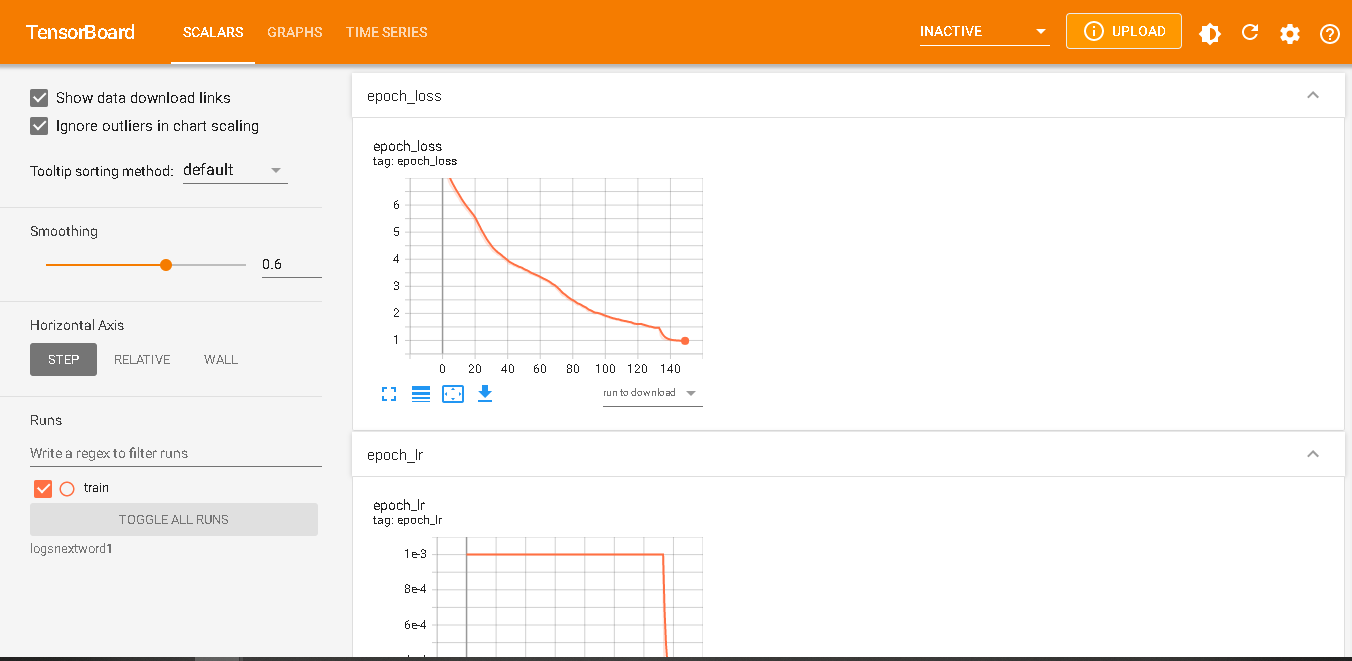

In [13]:
from IPython.display import Image 
pil_img = Image(filename="C:\\Users\\Haitam\\Desktop\\graph.png")
display(pil_img)